# TIME SERIES FORECASTING (FUTURE IMPROVEMENT)

In [38]:
#NOT IMPLEMENTED

In [7]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [8]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import re

import matplotlib.pylab as plt
import seaborn as sns
from ipywidgets import interact

import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [9]:
data = pd.read_csv('prepared_data.csv')
print('Rows: {}\nColumns: {}'.format(data.shape[0], data.shape[1]))

Rows: 1707161
Columns: 53


In [10]:
# display any feature timeserie for any match
cols = data.columns
r = re.compile("diff_rating|diff_score.*")
cols_drop = list(filter(r.match, cols)) + ['match_id', 'current_time',
                                           'timestamp',
                                           'player_1_wins']

data1 = data.drop(cols_drop, axis=1)

@interact
def match_plots(match=list(data.match_id.unique()),
                column=list(data1.columns)):         
    
    match_data_df = data.loc[data['match_id'] == match]
    plt.figure(figsize=(12,6))
    sns.lineplot(x="timestamp", y=column, data=match_data_df)
    plt.title("Column '{}' Through Match Time".format(column))
    
    if match_data_df.player_1_wins.mean() == 1:
        print(' Player 1 won')
    else:
        print(' Player 1 lost')

interactive(children=(Dropdown(description='match', options=(16720609, 16720612, 16720613, 16720615, 16720616,…

## Ploting most important features:

In [18]:
#selecting most important features (assumption)
impfeat = data[['match_id', 'timestamp','player_1_wins',
              'diff_score_total','diff_score_technology',
             'diff_total_resources_food','diff_score_economy', 
             'diff_population_total']]

impfeat.head()

,match_id,timestamp,player_1_wins,diff_score_total,diff_score_technology,diff_total_resources_food,diff_score_economy,diff_population_total
0,16720609,0,0,2,0,0,2,0
1,16720609,1,0,2,0,0,2,0
2,16720609,2,0,22,0,0,22,0
3,16720609,3,0,25,0,0,25,0
4,16720609,4,0,28,0,0,28,0


In [19]:
#displaying most important features evolution for any match
@interact
def match_plots(match=list(impfeat.match_id.unique())):   
    
    #selecting match
    match_data_df = impfeat.loc[impfeat['match_id'] == match]
    
    #scaling
    scaler = MinMaxScaler(feature_range=(-1, 1))
    cols = ['diff_population_total','diff_score_total','diff_score_technology',
             'diff_total_resources_food','diff_score_economy']
    match_data_df[cols] = scaler.fit_transform(match_data_df[cols])

    #ploting
    #we don't plot 'diff_rating' because it's a constant value, we plot 'diff_population instead' 
    plt.figure(figsize=(17,8))
    plt.plot( 'timestamp', 'diff_score_total', data=match_data_df,
             color='b')
    plt.plot( 'timestamp', 'diff_score_technology', data=match_data_df,
             color='g')
    plt.plot( 'timestamp', 'diff_total_resources_food', data=match_data_df,
             color='orange')
    plt.plot( 'timestamp', 'diff_score_economy', data=match_data_df,
             color='grey')
    plt.plot( 'timestamp', 'diff_population_total', data=match_data_df, 
             color='r')
    plt.title('Most important features')
    plt.legend()
    
    if match_data_df.player_1_wins.mean() == 1:
        print(' Player 1 won')
    else:
        print(' Player 1 lost')

interactive(children=(Dropdown(description='match', options=(16720609, 16720612, 16720613, 16720615, 16720616,…

In [20]:
data.columns

Index(['match_id', 'current_time', 'timestamp', 'diff_units_infantry',
       'diff_units_ranged', 'diff_units_siege', 'diff_units_war_ships',
       'diff_units_cavalry_archers', 'diff_units_cavalry', 'diff_units_monks',
       'diff_units_idle_fishing_ships', 'diff_units_stone_miners',
       'diff_units_gold_miners', 'diff_units_lumberjacks',
       'diff_units_hunters', 'diff_units_foragers', 'diff_units_farmers',
       'diff_units_idle_villagers', 'diff_units_fishermen',
       'diff_units_sheperds', 'diff_units_trade', 'diff_units_fishing_ships',
       'diff_units_repairer', 'diff_units_builder',
       'diff_current_resources_food', 'diff_current_resources_wood',
       'diff_current_resources_stone', 'diff_current_resources_gold',
       'diff_total_resources_food', 'diff_total_resources_wood',
       'diff_total_resources_stone', 'diff_total_resources_gold',
       'diff_total_resources_relic_gold',
       'diff_total_resources_trade_cart_gold', 'diff_population_total',
    

In [21]:
#df for a demo match (id: 16720620)
impfeat = data[['match_id','player_1_wins',
              'diff_total_resources_food', 'diff_population_total',
              'diff_total_resources_wood', 'diff_percent_explored',
              'diff_population_civilian']]

demo_match = impfeat.loc[impfeat['match_id'] == 16720620]
demo_match.head()

,match_id,player_1_wins,diff_total_resources_food,diff_population_total,diff_total_resources_wood,diff_percent_explored,diff_population_civilian
5651,16720620,1,0,0,0,0,0
5652,16720620,1,0,0,0,0,0
5653,16720620,1,0,0,0,0,0
5654,16720620,1,0,0,0,0,0
5655,16720620,1,0,0,0,0,0


In [22]:
demo_match.shape

(697, 7)

In [23]:
#Set a 'DatetimeIndex' with an interow interval of 3 seconds. -> to do: remove date
start='00:00:00'
demo_match.index = pd.DatetimeIndex(freq='3s', start=start, periods=demo_match.shape[0])

In [24]:
demo_match

,match_id,player_1_wins,diff_total_resources_food,diff_population_total,diff_total_resources_wood,diff_percent_explored,diff_population_civilian
2020-06-08 00:00:00,16720620,1,0,0,0,0,0
2020-06-08 00:00:03,16720620,1,0,0,0,0,0
2020-06-08 00:00:06,16720620,1,0,0,0,0,0
2020-06-08 00:00:09,16720620,1,0,0,0,0,0
2020-06-08 00:00:12,16720620,1,0,0,0,0,0
...,...,...,...,...,...,...,...
2020-06-08 00:34:36,16720620,1,5079,89,3536,15,66
2020-06-08 00:34:39,16720620,1,5107,89,3536,15,66
2020-06-08 00:34:42,16720620,1,5121,89,3549,15,66
2020-06-08 00:34:45,16720620,1,5177,89,3584,15,66


In [25]:
#format 'current_time' 
#import datetime
#demo_match['current_time'] = demo_match['current_time'].apply(lambda x: str(datetime.timedelta(seconds=x)))

In [26]:
#convert 'current_time' to datetime type
#demo_match['current_time'] = pd.to_datetime(demo_match['current_time'])

In [27]:
# set 'current_time' as index
#demo_match = demo_match.set_index('current_time').drop('match_id', axis=1)
#demo_match.head(50)

In [28]:
#check datatype of index
demo_match.index

DatetimeIndex(['2020-06-08 00:00:00', '2020-06-08 00:00:03',
               '2020-06-08 00:00:06', '2020-06-08 00:00:09',
               '2020-06-08 00:00:12', '2020-06-08 00:00:15',
               '2020-06-08 00:00:18', '2020-06-08 00:00:21',
               '2020-06-08 00:00:24', '2020-06-08 00:00:27',
               ...
               '2020-06-08 00:34:21', '2020-06-08 00:34:24',
               '2020-06-08 00:34:27', '2020-06-08 00:34:30',
               '2020-06-08 00:34:33', '2020-06-08 00:34:36',
               '2020-06-08 00:34:39', '2020-06-08 00:34:42',
               '2020-06-08 00:34:45', '2020-06-08 00:34:48'],
              dtype='datetime64[ns]', length=697, freq='3S')

In [29]:
#check frequency
print(demo_match.index.freq)

<3 * Seconds>


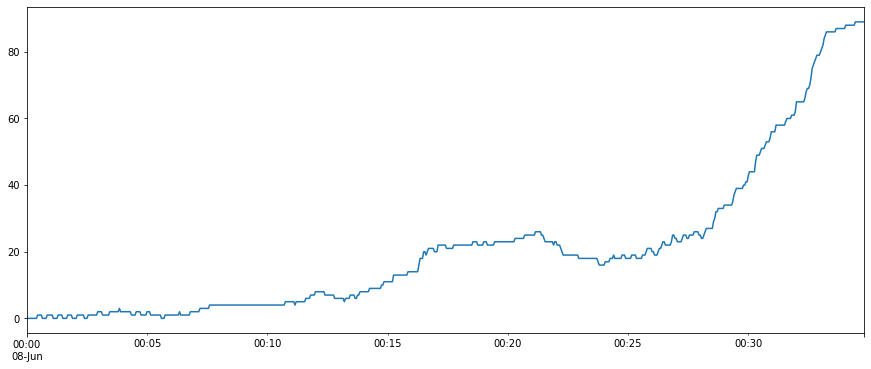

In [30]:
#plot total population difference timeserie for demo match
y = demo_match.diff_population_total
y.plot(figsize=(15, 6))
plt.show()

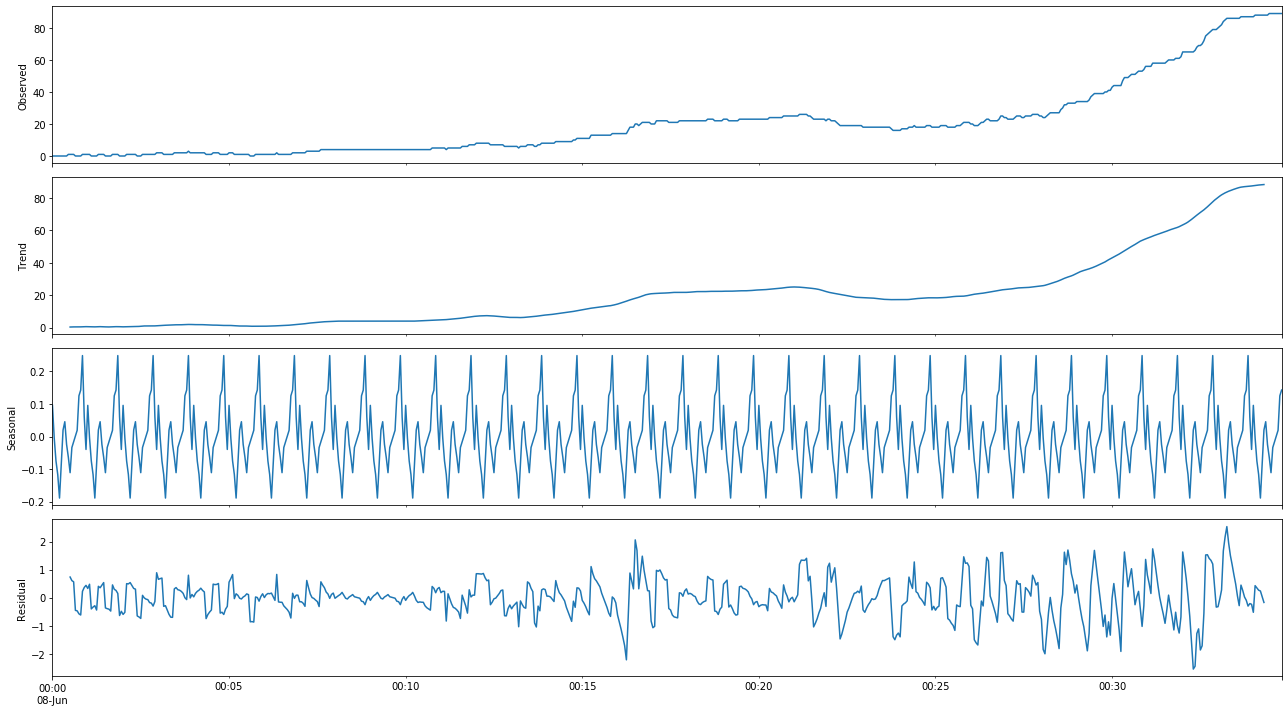

In [31]:
#can we decompose this timeserie? is there any trend and seasonality??? 
rcParams['figure.figsize'] = 18, 10 
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=20) #freq=20: 20 rows/minute
fig = decomposition.plot()

In [32]:
#ARIMA:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [33]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:6746.927654952457
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:5802.526541552609
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3568.751684125041
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3240.897835339668
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3159.7553059524616
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3064.286662620714
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3091.462310500554
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3042.5426932952696
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:5793.726392213506
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4878.266459064946
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2782.6941350275174
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2569.34174963895
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2462.100197494394
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2417.377876576423
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2487.148482728182
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2409.134054044862
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1196.646090636608
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1169.827843555296
ARIMA(0,

In [34]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1040      0.310      0.335      0.737      -0.504       0.712
ma.L1          0.0089      0.318      0.028      0.978      -0.613       0.631
ar.S.L12      -0.4353      0.029    -14.795      0.000      -0.493      -0.378
sigma2         0.4506      0.016     28.656      0.000       0.420       0.481


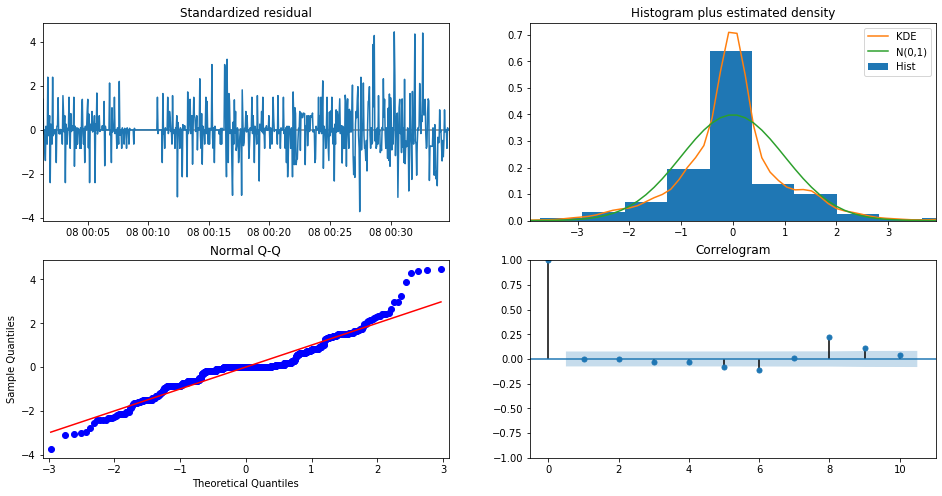

In [35]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [36]:
pd.set_option('display.max_rows', 500)
demo_match.head(500)

,match_id,player_1_wins,diff_total_resources_food,diff_population_total,diff_total_resources_wood,diff_percent_explored,diff_population_civilian
2020-06-08 00:00:00,16720620,1,0,0,0,0,0
2020-06-08 00:00:03,16720620,1,0,0,0,0,0
2020-06-08 00:00:06,16720620,1,0,0,0,0,0
2020-06-08 00:00:09,16720620,1,0,0,0,0,0
2020-06-08 00:00:12,16720620,1,0,0,0,0,0
2020-06-08 00:00:15,16720620,1,0,0,0,0,0
2020-06-08 00:00:18,16720620,1,0,0,0,1,0
2020-06-08 00:00:21,16720620,1,0,0,0,1,0
2020-06-08 00:00:24,16720620,1,0,0,0,0,0
2020-06-08 00:00:27,16720620,1,0,1,0,0,1


In [37]:
#predict 'diff_population_total' since minute 25 game time
pred = results.get_prediction(start=pd.to_datetime('2020-06-03 00:25:00'), dynamic=False)
pred_ci = pred.conf_int()


ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('diff_population_total')
plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'